**LIBRERIE:**
```
from sklearn.decomposition import PCA
```
trasforma i dati da uno spazio di dimensioni elevate a uno spazio di dimensioni ridotte con una perdita minima di informazioni e rimuovendo anche la ridondanza nel set di dati.

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2

**LINEARIZZO L'IMMAGINE**



Numpy squeeze() restituisce l'array di input con il sottoinsieme della dimensione avente una lunghezza uguale a uno rimosso dall'array.

In [93]:
def lin_image(base_image):
    (H,W,channel) = np.shape(base_image) #prendo la forma (altezza,larghezza e canali)
    lin_image = base_image.reshape(H*W,channel).squeeze() #linearizzo, togliendo una dimensione
    return lin_image

**DELINEARIZZO UN'IMMAGINE PRE-LINEARIZZATA**

In [94]:
def unlin_image(in_image,H,W):
    (L,channel) = np.shape(in_image)#Prendo la forma e salvo in L
    #Vado a verificare le possibili dimensioni dell'immagine
    if L != H*W:
        raise ValueError('The length of the image does not correspond to the Height and width input')
    # dlinearizzo
    base_image = in_image.reshape(H,W,channel).squeeze() #torna alla forma iniziale 
    return base_image

**CALCOLO IL PCA DELL'IMMAGINE**

In [95]:
## Compute the PCA of the image
def PCAImage(image,n_components=1): #spazio dimensionale (?)
    # Ottengo la dimensione dell'immagine
    (H, W, ch) = np.shape(image)

    #Creo un oggetto PCA dalla libreria scikit-learn
    sklearn_pca = PCA(n_components=n_components)

    #Applico il PCA all'immagine linearizzata
    lin_pca = sklearn_pca.fit_transform(lin_image(image))

    #Trasformo l'immagine linearizzata in immagine normale
    out_pca = unlin_image(lin_pca, H, W)

    #cast dell'immagine di output nel formato uint8 (0-255)
    out_pca = np.uint8((out_pca - np.min(out_pca)) * 255 / (np.max(out_pca) - np.min(out_pca))) #varianza/covarianza(?)
    return out_pca

**DEFINISCO LE FUNZIONI**

In [96]:
def imageInputPLot():
    #Plot the image
    plt.figure()
    plt.plot()
    plt.title('Input image')
    plt.imshow(input_image)

In [97]:
def imageGrayTransf():
    #Gray image transform
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    #Plot gray image
    plt.plot()
    plt.title('Gray image')
    plt.imshow(gray_image, cmap='gray')

In [98]:
def imagePcaTransf():
    #Compute the pca transform
    pca_image = PCAImage(input_image, n_components=1) #mi cambia il colore pca

    #Plot pca image
    plt.plot()
    plt.title('PCA image')
    plt.imshow(pca_image, cmap='gray')
    plt.show()

In [99]:
if __name__ == '__main__':
    
    input_image =cv2.imread('/content/drive/MyDrive/progettoCV&DL/esercizio iniziale/img/color_balls.jpg')
    input_image =cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    pca_image = PCAImage(input_image, n_components=1)
    
    

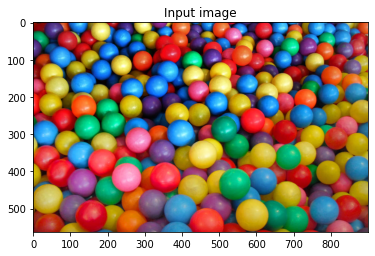

In [100]:
#Leggo l'immagine e calcolo la trasformazione in scala di grigi
input_image =cv2.imread('/content/drive/MyDrive/progettoCV&DL/esercizio iniziale/img/color_balls.jpg')
input_image =cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    
imageInputPLot()

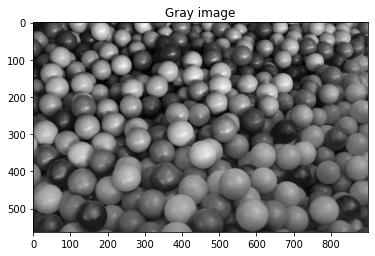

In [101]:
imageGrayTransf()

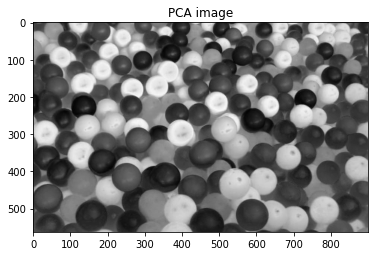

In [102]:
imagePcaTransf()

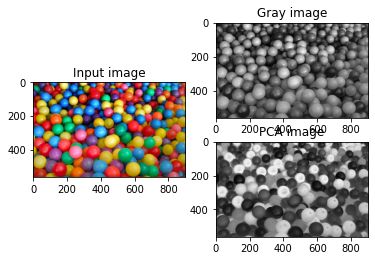

In [103]:
 # Il primo grafico mostra l'immagine originale, 
 # il secondo in scala di grigi, 
 # il terzo con metodo PCA
plt.figure()
plt.subplot(1,2,1)
plt.title('Input image')
plt.imshow(input_image)

plt.subplot(2,2,2)
plt.title('Gray image')
plt.imshow(gray_image, cmap='gray')

plt.subplot(2,2,4)
plt.title('PCA image')
plt.imshow(pca_image, cmap='gray')
plt.show()


#L'analisi dei componenti principali (PCA) è una tecnica statistica utilizzata per la riduzione dei dati senza perdere le sue proprietà. 
#Fondamentalmente, descrive la composizione di varianze e covarianze attraverso diverse combinazioni lineari delle variabili primarie, senza perdere una parte importante dell'informazione originale.